<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 78)
# pd.set_option('precision', 3) 

In [2]:
import yfinance as yf

def get_options_data(ticker: "Ticker en formato string", download_data=False, fecha=None):
    """
    options_yf descarga información de opciones financieras con ayuda de yfinance

    *ticker : es el símbolo de cotización de la acción
    """
    stock = yf.Ticker(ticker)
    
    if fecha is None:
        fecha = stock.options[0]
        print(f'Fechas de cierre de contrato para las opciones: \n {stock.options}')
    
    if download_data:
        print(f'Se está descargando datos de call y put de la fecha {fecha}')
        calls, puts = stock.option_chain(fecha) 
        return (calls, puts)

ticker = 'AAPL'

get_options_data(ticker, download_data=False)

Fechas de cierre de contrato para las opciones: 
 ('2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-09', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [3]:
expiry_date = '2023-12-15'
calls, puts = get_options_data(ticker, download_data=True, fecha=expiry_date)

Se está descargando datos de call y put de la fecha 2023-12-15


In [4]:
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL231215P00065000,2023-05-02 14:54:26+00:00,65.0,0.19,0.18,0.21,0.00,0.000000,16.0,567,0.534184,False,REGULAR,USD
1,AAPL231215P00070000,2023-05-02 13:30:00+00:00,70.0,0.20,0.23,0.27,0.00,0.000000,1.0,3242,0.512212,False,REGULAR,USD
2,AAPL231215P00075000,2023-05-03 18:43:50+00:00,75.0,0.28,0.30,0.34,0.00,0.000000,2.0,1248,0.496587,False,REGULAR,USD
3,AAPL231215P00080000,2023-05-04 16:05:59+00:00,80.0,0.42,0.40,0.43,0.10,31.250000,4.0,1848,0.477544,False,REGULAR,USD
4,AAPL231215P00085000,2023-05-04 13:33:12+00:00,85.0,0.56,0.50,0.54,0.13,30.232557,6.0,945,0.459234,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,AAPL231215P00220000,2023-02-09 14:57:40+00:00,220.0,66.67,70.85,72.05,0.00,0.000000,15.0,0,0.642154,True,REGULAR,USD
32,AAPL231215P00235000,2022-12-20 16:08:55+00:00,235.0,103.00,99.10,100.35,0.00,0.000000,NaN,0,0.963440,True,REGULAR,USD
33,AAPL231215P00255000,2023-03-28 17:05:49+00:00,255.0,98.60,85.85,88.15,0.00,0.000000,NaN,0,0.000010,True,REGULAR,USD
34,AAPL231215P00285000,2023-01-30 14:31:39+00:00,285.0,139.56,136.20,140.45,0.00,0.000000,1.0,0,0.899446,True,REGULAR,USD


In [5]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL231215C00065000,2023-04-19 16:48:01+00:00,65.0,104.40,100.80,103.45,0.0,0.0,2,7,0.769534,True,REGULAR,USD
1,AAPL231215C00070000,2023-04-25 15:02:15+00:00,70.0,97.20,95.85,98.80,0.0,0.0,34,93,0.734134,True,REGULAR,USD
2,AAPL231215C00075000,2023-05-03 17:25:31+00:00,75.0,97.08,91.30,93.95,0.0,0.0,10,115,0.707767,True,REGULAR,USD
3,AAPL231215C00080000,2023-04-20 18:08:16+00:00,80.0,89.55,86.65,89.35,0.0,0.0,13,40,0.685428,True,REGULAR,USD
4,AAPL231215C00085000,2023-05-03 15:43:03+00:00,85.0,86.79,82.95,83.85,0.0,0.0,6,25,0.662845,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,AAPL231215C00275000,2023-04-28 16:24:38+00:00,275.0,0.08,0.06,0.10,0.0,0.0,25,167,0.262703,False,REGULAR,USD
43,AAPL231215C00280000,2023-04-12 19:10:35+00:00,280.0,0.06,0.05,0.09,0.0,0.0,15,77,0.267097,False,REGULAR,USD
44,AAPL231215C00285000,2023-04-18 14:16:20+00:00,285.0,0.03,0.04,0.08,0.0,0.0,1,5,0.271492,False,REGULAR,USD
45,AAPL231215C00290000,2023-05-03 13:30:00+00:00,290.0,0.07,0.03,0.07,0.0,0.0,10,27,0.274421,False,REGULAR,USD


Datos de la opción

In [6]:
calls.loc[0, :]

contractSymbol             AAPL231215C00065000
lastTradeDate        2023-04-19 16:48:01+00:00
strike                                    65.0
lastPrice                                104.4
bid                                      100.8
ask                                     103.45
change                                     0.0
percentChange                              0.0
volume                                       2
openInterest                                 7
impliedVolatility                     0.769534
inTheMoney                                True
contractSize                           REGULAR
currency                                   USD
Name: 0, dtype: object

### Conceptos claves
- El precio de la oferta ('bid') se refiere al precio más alto que un comprador pagará por un activo.
- El precio de venta ('ask') se refiere al precio más bajo que un vendedor aceptará por un activo.
- La diferencia entre estos dos precios se conoce como 'spread'; cuanto menor es el spread, mayor es la liquidez de la garantía dada.
- Liquidez: facilidad de convertir cierta opción en efectivo.
- La volatilidad implícita es el pronóstico del mercado de un probable movimiento en el precio de un valor.
- La volatilidad implícita aumenta en los mercados bajistas y disminuye cuando el mercado es alcista.
- El último precio ('lastprice') representa el precio al que ocurrió la última operación, de una opción dada.

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha.

In [7]:
get_options_data('AAPL')

Fechas de cierre de contrato para las opciones: 
 ('2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-09', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [8]:
fecha1 = '2024-09-20'
fecha2 = '2023-08-18'
ticker = 'AAPL'

calls_f1, puts_f1 = get_options_data(ticker, download_data=True, fecha=fecha1)

calls_f2, puts_f2 = get_options_data(ticker, download_data=True, fecha=fecha2)

calls_f1


Se está descargando datos de call y put de la fecha 2024-09-20
Se está descargando datos de call y put de la fecha 2023-08-18


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240920C00050000,2023-05-02 19:53:39+00:00,50.0,120.64,116.10,118.10,0.00,0.000000,1.0,2,0.642215,True,REGULAR,USD
1,AAPL240920C00065000,2023-04-26 19:12:08+00:00,65.0,102.09,102.05,105.20,0.00,0.000000,NaN,0,0.603153,True,REGULAR,USD
2,AAPL240920C00070000,2023-01-19 19:00:03+00:00,70.0,70.80,86.10,89.20,0.00,0.000000,NaN,20,0.000010,True,REGULAR,USD
3,AAPL240920C00080000,2023-05-02 17:02:41+00:00,80.0,93.50,88.65,92.25,0.00,0.000000,3.0,7,0.557439,True,REGULAR,USD
4,AAPL240920C00085000,2023-01-26 17:40:52+00:00,85.0,65.50,68.35,70.90,0.00,0.000000,NaN,1,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,AAPL240920C00270000,2023-04-28 15:32:43+00:00,270.0,1.38,1.17,1.30,0.00,0.000000,247.0,284,0.252510,False,REGULAR,USD
42,AAPL240920C00280000,2023-05-03 18:02:23+00:00,280.0,1.02,0.84,0.91,0.00,0.000000,1.0,42,0.249031,False,REGULAR,USD
43,AAPL240920C00290000,2023-05-01 14:08:49+00:00,290.0,0.76,0.53,0.76,0.00,0.000000,2.0,114,0.253670,False,REGULAR,USD
44,AAPL240920C00300000,2023-04-28 19:53:26+00:00,300.0,0.45,0.42,0.57,-0.08,-15.094337,1.0,503,0.253425,False,REGULAR,USD


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
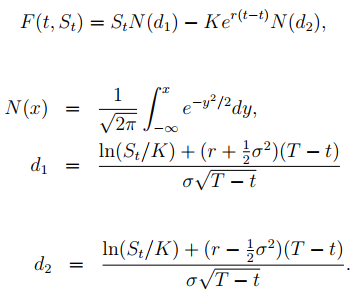
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

## Volatility smile 
-  Cuando las opciones con la misma fecha de vencimiento y el mismo activo subyacente, pero diferentes precios de ejercicio, se grafican por la volatilidad implícita, la tendencia es que ese gráfico muestre una sonrisa.
-  La sonrisa muestra que las opciones más alejadas 'in- or out-of-the-money' tienen la mayor volatilidad implícita.
- No todas las opciones tendrán una sonrisa de volatilidad implícita. Las opciones de acciones a corto plazo y las opciones relacionadas con la moneda tienen más probabilidades de tener una sonrisa de volatilidad

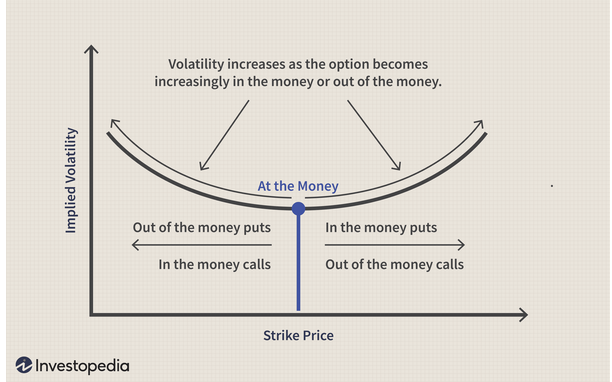

> Fuente: https://www.investopedia.com/terms/v/volatilitysmile.asp

> ### Validar para el call seleccionado. Encontrar el valor del activo subyacente [link](https://es.finance.yahoo.com/quote/AAPL/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABR84JCfGvfOqqwhhdyZDkm_jZhQyKTDrxwAfmp9jXl-VsvMSUbdIyj3UXrctm6rOvJ33GCHcZs3cYOkr60ISHUmiKBpNV3pffEWVAb1gyuQcT4U4LhhvaO3LASGq9oL1Bn9rCAODNzwokwbdHCvYx4WT4Au8QwCatcc3IbwU6yF)

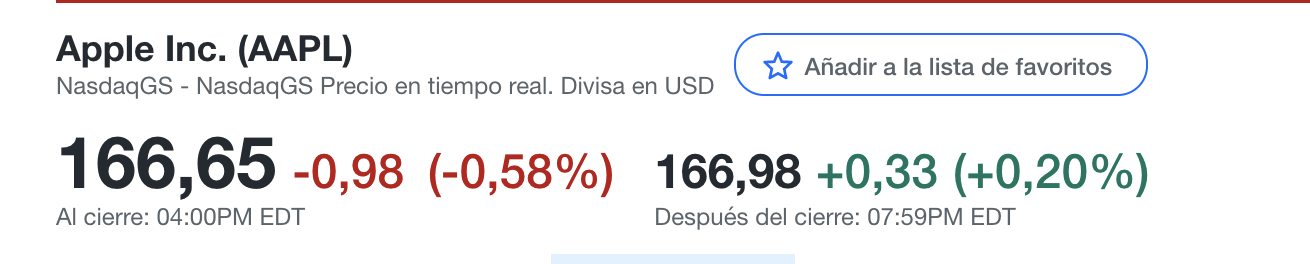

In [9]:
calls_f1.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240920C00050000,2023-05-02 19:53:39+00:00,50.0,120.64,116.10,118.10,0.0,0.0,1.0,2,0.642215,True,REGULAR,USD
1,AAPL240920C00065000,2023-04-26 19:12:08+00:00,65.0,102.09,102.05,105.20,0.0,0.0,NaN,0,0.603153,True,REGULAR,USD
2,AAPL240920C00070000,2023-01-19 19:00:03+00:00,70.0,70.80,86.10,89.20,0.0,0.0,NaN,20,0.000010,True,REGULAR,USD
3,AAPL240920C00080000,2023-05-02 17:02:41+00:00,80.0,93.50,88.65,92.25,0.0,0.0,3.0,7,0.557439,True,REGULAR,USD
4,AAPL240920C00085000,2023-01-26 17:40:52+00:00,85.0,65.50,68.35,70.90,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD


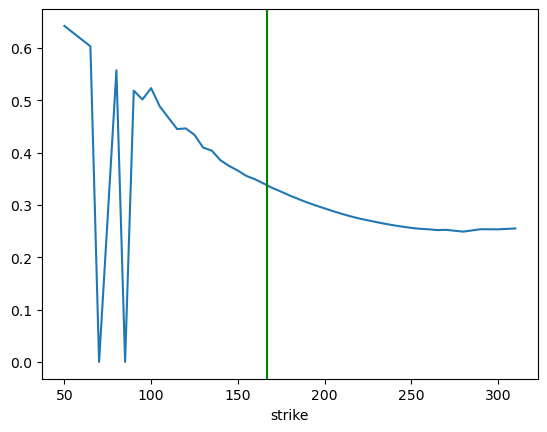

In [10]:
# para los call de la fecha 1

ax = calls_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

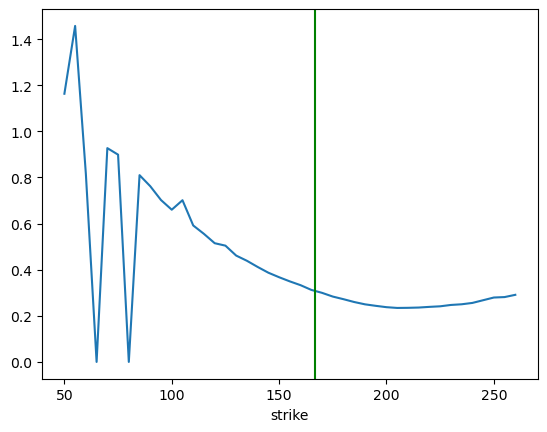

In [11]:
# para los call de la fecha 2
ax = calls_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Analicemos ahora datos de los `put`

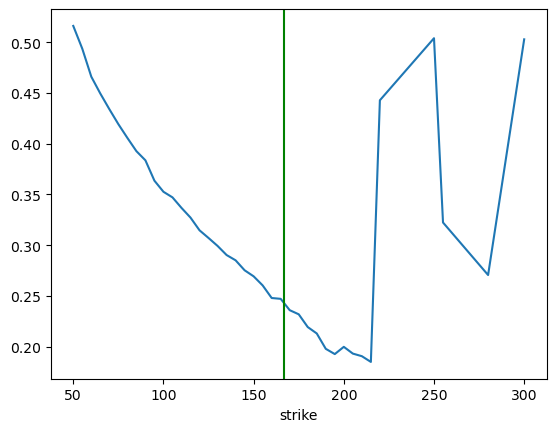

In [12]:
ax = puts_f1.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Para los `put` de la `fecha 1`

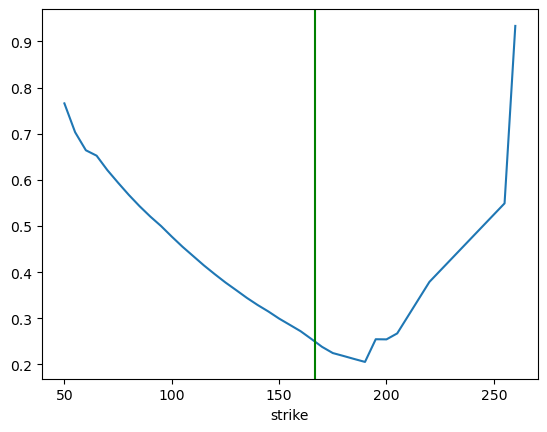

In [13]:
ax = puts_f2.set_index('strike')['impliedVolatility'].plot()
ax.axvline(166.65, color='g');

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [14]:
# Sobre escribir el paquete de yahoo finance a pandas datareader
import yfinance as yf
yf.pdr_override()

# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Si la cantidad de activos fue pasado cómo string entonces convertir el resultado a DataFrame
    if isinstance(tickers, str):
        closes = closes.to_frame(tickers)
    elif len(tickers) == 1:
        closes = closes.to_frame(tickers[0])
        
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

[*********************100%***********************]  1 of 1 completed


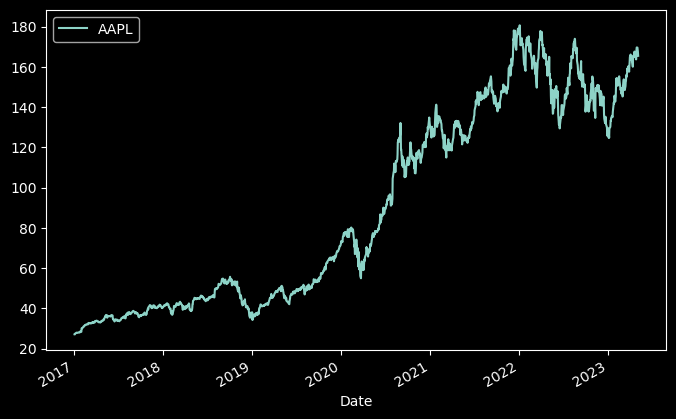

In [15]:
plt.style.use(['dark_background'])

ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [16]:
closes_aapl.iloc[-1]

AAPL    165.514999
Name: 2023-05-04 00:00:00, dtype: float64

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [17]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

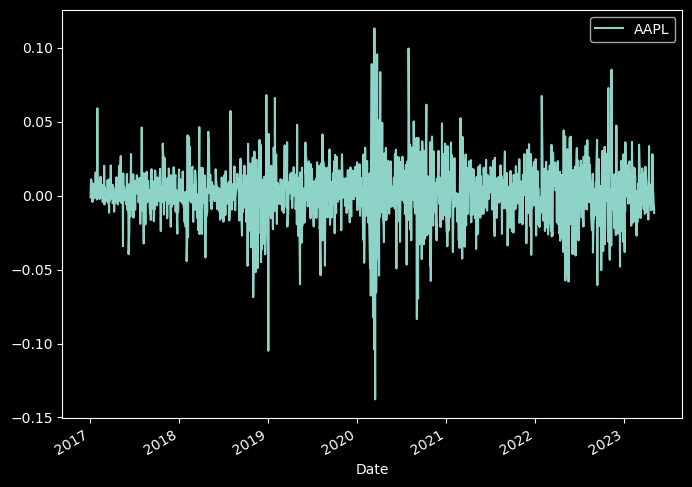

In [18]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [19]:
get_options_data('AAPL')

Fechas de cierre de contrato para las opciones: 
 ('2023-05-05', '2023-05-12', '2023-05-19', '2023-05-26', '2023-06-02', '2023-06-09', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2023-10-20', '2023-11-17', '2023-12-15', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [20]:
expiry = '2024-01-19'
call, put = get_options_data('AAPL', download_data=True, fecha=expiry)

Se está descargando datos de call y put de la fecha 2024-01-19


In [21]:
call.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240119C00050000,2023-05-02 14:56:53+00:00,50.0,119.45,115.85,117.90,0.000000,0.000000,10,17652,0.865236,True,REGULAR,USD
1,AAPL240119C00055000,2023-04-24 13:49:40+00:00,55.0,111.50,110.95,112.25,0.000000,0.000000,12,3680,0.764895,True,REGULAR,USD
2,AAPL240119C00060000,2023-05-01 18:07:28+00:00,60.0,111.50,107.10,107.75,0.000000,0.000000,3,2380,0.800539,True,REGULAR,USD
3,AAPL240119C00065000,2023-04-25 19:53:58+00:00,65.0,102.19,101.50,102.80,1.260002,1.248392,1,2804,0.717532,True,REGULAR,USD
4,AAPL240119C00070000,2023-05-04 16:19:20+00:00,70.0,97.84,97.55,98.20,-1.970001,-1.973751,15,2103,0.727298,True,REGULAR,USD


<AxesSubplot: xlabel='strike'>

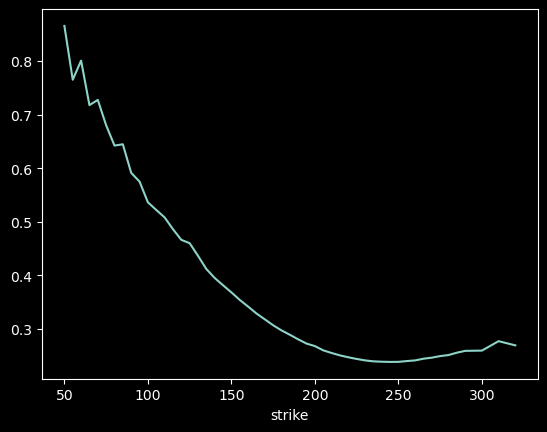

In [22]:
call.set_index('strike')['impliedVolatility'].plot()

In [23]:
call['strike'].unique()

array([ 50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.,
       105., 110., 115., 120., 125., 130., 135., 140., 145., 150., 155.,
       160., 165., 170., 175., 180., 185., 190., 195., 200., 205., 210.,
       215., 220., 225., 230., 235., 240., 245., 250., 255., 260., 265.,
       270., 275., 280., 285., 290., 300., 310., 320.])

In [24]:
# Strike price
K = 165
opcion_valuar = call[call['strike'] == K]
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
23,AAPL240119C00165000,2023-05-04 17:49:35+00:00,165.0,18.77,18.3,18.55,-0.85,-4.332316,332,18815,0.329017,True,REGULAR,USD


In [25]:
print('Precio del activo subyacente actual = ',closes_aapl.iloc[-1].values)

Precio del activo subyacente actual =  [165.51499939]


# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

## Rendimiento Simple

In [26]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

,AAPL
Date,
2017-01-04,-0.001119
2017-01-05,0.005086
2017-01-06,0.011148
2017-01-09,0.009160
2017-01-10,0.001009
...,...
2023-04-28,0.007541
2023-05-01,-0.000530
2023-05-02,-0.006191


In [27]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = expiry

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2023-05-04', '2023-05-05', '2023-05-08', '2023-05-09',
                '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15',
                '2023-05-16', '2023-05-17',
                ...
                '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
                '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
                '2024-01-18', '2024-01-19'],
               dtype='datetime64[ns]', length=187, freq='B'),
 187)

### Mostrar como simular precios usando los rendimientos

In [28]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2023-05-04,2.997456e-02,-1.734155e-03,-9.985820e-04,6.802856e-03,3.477336e-02,1.934215e-02,1.823519e-02,...,2.590955e-03,8.084243e-03,-1.289917e-02,7.154425e-03,-7.063270e-03,-2.893156e-02,9.859838e-03
2023-05-05,-1.167299e-04,-2.894414e-05,-2.508886e-05,-8.042411e-05,5.739946e-04,1.931476e-04,-1.573678e-04,...,7.729842e-06,6.225414e-05,3.703326e-04,6.975569e-05,1.073620e-04,7.559895e-04,-1.417415e-04
2023-05-08,-1.619330e-06,-2.270760e-07,9.851858e-10,2.590468e-07,-6.836357e-06,-3.053181e-06,-2.693774e-07,...,8.407055e-08,-8.716706e-07,4.743082e-06,-2.379198e-06,-8.191316e-07,-1.451594e-05,3.534182e-07
2023-05-09,2.002446e-08,-3.478007e-09,-1.995747e-12,-1.324143e-09,-5.046069e-08,-1.370636e-08,-8.940541e-09,...,-1.612195e-10,-2.794530e-08,-6.644763e-09,1.218048e-07,-2.130861e-10,-5.416817e-08,6.708439e-09
2023-05-10,1.644700e-12,1.600225e-11,-8.524576e-15,-2.316834e-11,-1.516246e-09,2.084464e-10,1.095878e-10,...,1.192159e-12,-1.753242e-10,-4.014200e-11,-6.985684e-10,-3.859414e-12,3.752888e-10,-1.624980e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
2024-01-16,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
2024-01-17,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
2024-01-18,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00


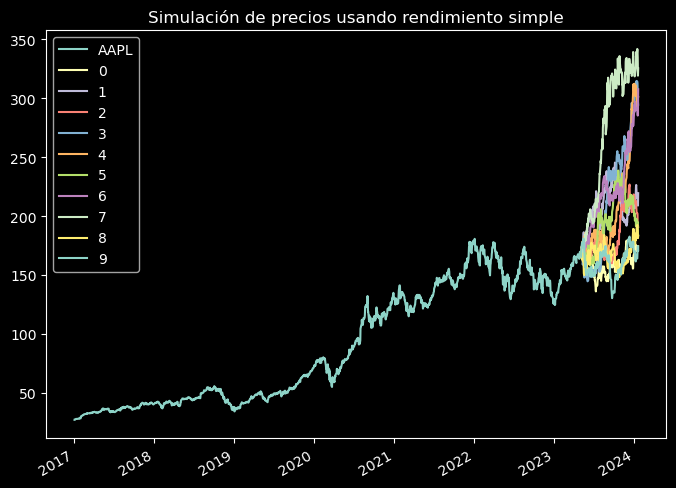

In [29]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Asignar al día de hoy el precio actual 
S_T.iloc[0, :] = closes_aapl.iloc[-1]

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [30]:
S_T.T.shape

(10000, 187)

## Rendimiento Logarítmico

0.39105878946137757

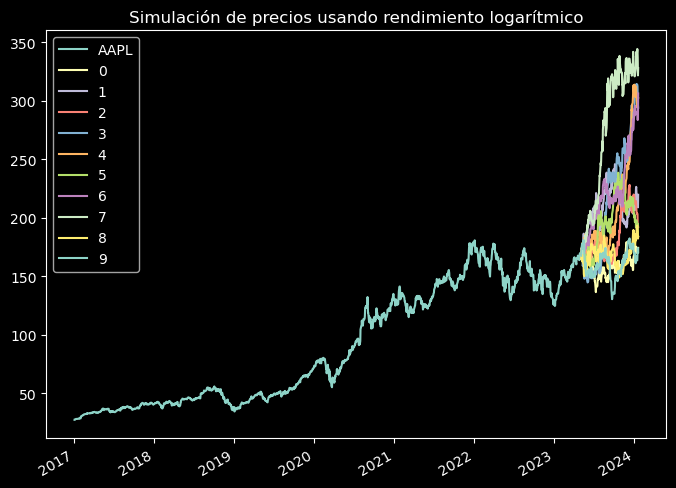

In [31]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [32]:
S_T2.iloc[0, :] = closes_aapl.iloc[-1]
S_T2

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2023-05-04,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,...,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999
2023-05-05,169.824522,167.945368,169.492854,164.622887,174.159698,170.377121,167.048809,...,166.376608,168.084599,158.706598,168.272930,161.807662,156.585238,164.705811
2023-05-08,172.164457,169.236032,169.453674,164.061850,172.064129,167.672124,167.302974,...,168.164259,165.715045,160.722064,162.597538,160.546667,153.576975,164.264002
2023-05-09,170.015372,171.815858,169.078202,163.193814,173.305974,168.394427,172.917321,...,167.809786,171.082587,160.466199,154.450837,160.557633,154.121722,167.380553
2023-05-10,169.996714,170.994110,169.769566,166.043278,178.559765,165.820315,170.777370,...,166.541157,172.126577,161.407832,153.537856,163.461617,153.027953,163.342343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,173.133894,216.777517,203.700147,313.866747,294.297755,194.137789,288.304479,...,331.549049,188.691604,281.161950,417.240323,411.360109,179.786152,180.806276
2024-01-16,173.504683,215.291154,202.963557,312.537246,306.085036,195.038635,286.928767,...,335.642958,186.495144,279.097108,421.135743,422.599982,185.444114,181.586412
2024-01-17,171.794534,216.324255,193.158310,303.049801,304.555183,194.926797,283.615082,...,322.812578,185.083168,272.072344,419.637109,426.375311,187.122492,187.626515
2024-01-18,170.041327,208.877984,193.760485,296.758881,303.231591,183.337182,287.487415,...,329.913482,188.878216,268.742786,437.987474,439.604672,180.190962,196.568498


In [33]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019540827073663523, 0.019546385018541806)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(S_T - K,0)
$$

In [34]:
S_T2.shape

(187, 10000)

Prima    41.527718
Name: 2024-01-19 00:00:00, dtype: float64

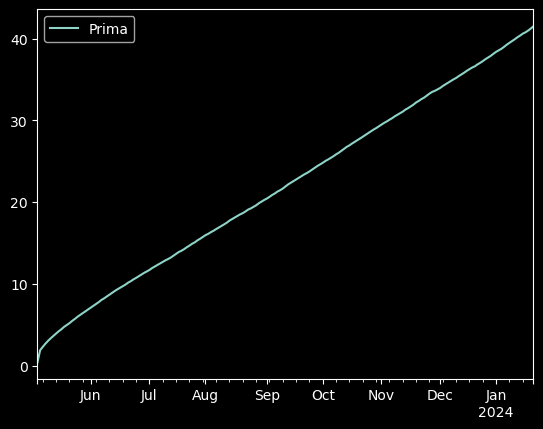

In [35]:
strike = K
call = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(S_T2-strike, 0).mean(axis=1)}, index=dates)
call.plot();
call.iloc[-1]

In [36]:
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
23,AAPL240119C00165000,2023-05-04 17:49:35+00:00,165.0,18.77,18.3,18.55,-0.85,-4.332316,332,18815,0.329017,True,REGULAR,USD


## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [37]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0011344411060170612, 0.019546385018541806)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [38]:
# Tasa de bonos de 1 yr de fecha 27/04/23 -> 4.60%
r = 0.046/365 # Tasa diaria

In [39]:
r

0.00012602739726027396

- Simularemos el tiempo de contrato desde `HOY` hasta la fecha de `Expiry`, 10 escenarios:
    
    - Generar fechas

In [40]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = pd.to_datetime(expiry)

nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2023-05-04', '2023-05-05', '2023-05-08', '2023-05-09',
               '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15',
               '2023-05-16', '2023-05-17',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', length=187, freq='B')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [41]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,3,4,5,6,7,8,9
2023-05-04,-0.010547,-0.031223,-0.018398,-0.014124,-0.032718,0.008287,0.013248,0.022029,0.018350,-0.010173
2023-05-05,0.002317,-0.020262,0.014247,-0.040152,-0.007711,0.003723,0.044765,0.055554,0.038885,0.021575
2023-05-08,0.011985,-0.037849,0.044982,-0.024159,-0.001662,-0.041236,0.009898,0.027602,0.051715,0.028899
2023-05-09,0.048825,-0.082851,0.038166,-0.016212,-0.013555,-0.037706,-0.001184,0.012078,0.053263,0.066680
2023-05-10,0.045823,-0.067907,0.017557,0.005653,-0.003751,-0.005518,0.001437,0.020816,0.068683,0.103766
...,...,...,...,...,...,...,...,...,...,...
2024-01-15,0.104180,-0.117646,0.323211,-0.030000,0.447245,-0.087184,-0.239984,0.120780,0.245679,0.366099
2024-01-16,0.089992,-0.084096,0.352273,-0.049946,0.442838,-0.098718,-0.240974,0.111560,0.247860,0.358528
2024-01-17,0.098880,-0.040780,0.367893,-0.071050,0.462046,-0.124330,-0.231337,0.090425,0.271592,0.372449
2024-01-18,0.104459,-0.030031,0.428021,-0.053399,0.433263,-0.140843,-0.201794,0.091876,0.260263,0.350961


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [42]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,3,4,5,6,7,8,9
2023-05-04,163.778424,160.426980,162.497705,163.193694,160.187320,166.892238,167.722292,169.201588,168.580230,163.839725
2023-05-05,165.898896,162.195062,167.890005,159.000880,164.243683,166.132433,173.092566,174.970236,172.077801,169.124753
2023-05-08,167.510578,159.367561,173.130209,161.564298,165.240139,158.828642,167.161389,170.147230,174.299887,170.368032
2023-05-09,173.796800,152.354674,171.954160,162.853275,163.286608,159.390365,165.319086,167.526195,174.569807,176.927766
2023-05-10,173.275845,154.648506,168.446567,166.453246,164.895236,164.604241,165.752955,168.996484,177.282493,183.612535
...,...,...,...,...,...,...,...,...,...,...
2024-01-15,183.688601,147.144547,228.668472,160.623242,258.864970,151.695821,130.200785,186.763350,211.609094,238.688814
2024-01-16,181.100862,152.165107,235.411424,157.451301,257.726655,149.956301,130.072015,185.049126,212.071078,236.888600
2024-01-17,182.717518,158.901031,239.117362,154.163260,262.724874,146.164435,131.331527,181.179210,217.164166,240.209463
2024-01-18,183.739927,160.618363,253.936265,156.908466,255.270718,143.770573,135.269306,181.442383,214.717925,235.102720


- Graficar:

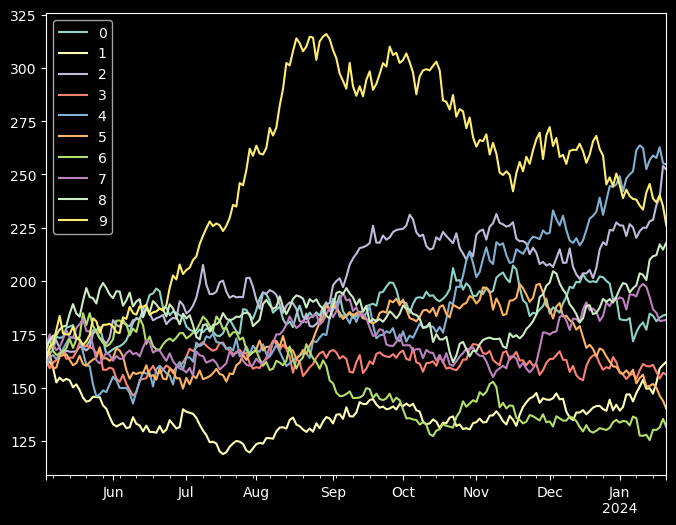

In [43]:
sim_closes.plot(figsize=(8,6));

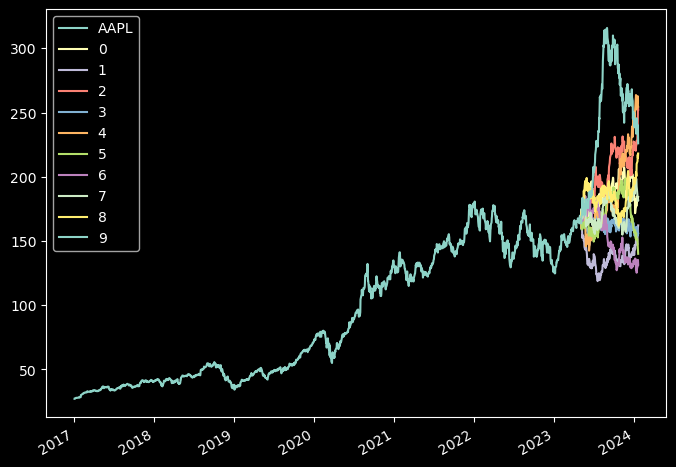

In [44]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [45]:
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
23,AAPL240119C00165000,2023-05-04 17:49:35+00:00,165.0,18.77,18.3,18.55,-0.85,-4.332316,332,18815,0.329017,True,REGULAR,USD


In [46]:
# 252 días de negociación en un año 
sigma = sigma/np.sqrt(252)
sigma

0.001231306518794768

In [47]:
from datetime import date
Hoy = date.today()
K = K  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, end=expiry, freq='B')
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

# strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,3,4,5,6,...,99993,99994,99995,99996,99997,99998,99999
2023-05-04,165.668817,165.546613,165.342252,165.706209,165.212659,165.718704,165.502478,...,165.421784,165.418964,165.833307,165.571151,165.350136,165.697892,165.544618
2023-05-05,165.247211,165.736765,165.137109,165.815664,165.051616,165.785853,165.710834,...,165.663051,165.462795,165.802269,165.795162,165.430503,165.463460,165.605308
2023-05-08,165.003769,165.459480,164.956264,165.985732,164.771810,165.727926,165.342880,...,165.622398,165.755696,165.860741,166.005099,165.552041,165.528613,165.406859
2023-05-09,165.094493,165.759835,165.208857,166.323220,164.489000,165.766613,165.397249,...,165.124844,165.617319,165.862236,166.010360,165.393114,165.615412,165.583927
2023-05-10,164.760369,165.787128,165.211130,166.722885,164.589373,165.603448,165.518119,...,164.985683,165.794670,165.797485,165.929510,165.243819,165.557755,165.700043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,165.721286,173.526314,165.003082,174.573942,168.665022,167.313476,172.617770,...,171.328330,170.875739,169.492251,168.702344,174.767507,170.269461,169.617793
2024-01-16,165.775878,173.917659,165.055918,174.800427,168.626161,167.038705,172.262821,...,170.912086,170.915930,169.489890,168.650335,174.914628,170.367345,169.503004
2024-01-17,165.747958,173.896801,165.026981,174.995982,168.590450,166.837862,172.058770,...,170.972710,171.004993,169.402050,168.444377,175.027108,170.189611,169.778288
2024-01-18,165.814621,173.640217,164.998699,175.018274,168.680805,167.157431,172.024631,...,171.083089,171.104625,169.392107,168.603610,174.540172,170.167698,169.813524


In [48]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

,0,1,2,3,4,5,6,...,99993,99994,99995,99996,99997,99998,99999
2023-05-04,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,...,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999,165.514999
2023-05-05,165.247211,165.736765,165.137109,165.815664,165.051616,165.785853,165.710834,...,165.663051,165.462795,165.802269,165.795162,165.430503,165.463460,165.605308
2023-05-08,165.003769,165.459480,164.956264,165.985732,164.771810,165.727926,165.342880,...,165.622398,165.755696,165.860741,166.005099,165.552041,165.528613,165.406859
2023-05-09,165.094493,165.759835,165.208857,166.323220,164.489000,165.766613,165.397249,...,165.124844,165.617319,165.862236,166.010360,165.393114,165.615412,165.583927
2023-05-10,164.760369,165.787128,165.211130,166.722885,164.589373,165.603448,165.518119,...,164.985683,165.794670,165.797485,165.929510,165.243819,165.557755,165.700043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,165.721286,173.526314,165.003082,174.573942,168.665022,167.313476,172.617770,...,171.328330,170.875739,169.492251,168.702344,174.767507,170.269461,169.617793
2024-01-16,165.775878,173.917659,165.055918,174.800427,168.626161,167.038705,172.262821,...,170.912086,170.915930,169.489890,168.650335,174.914628,170.367345,169.503004
2024-01-17,165.747958,173.896801,165.026981,174.995982,168.590450,166.837862,172.058770,...,170.972710,171.004993,169.402050,168.444377,175.027108,170.189611,169.778288
2024-01-18,165.814621,173.640217,164.998699,175.018274,168.680805,167.157431,172.024631,...,171.083089,171.104625,169.392107,168.603610,174.540172,170.167698,169.813524


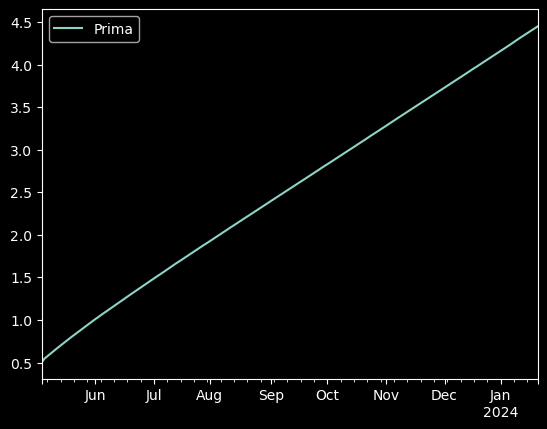

In [49]:
strike = K
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, index=dates)
call.plot();


La valuación de la opción es:

In [50]:
call.iloc[-1]

Prima    4.449892
Name: 2024-01-19 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [51]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


(4.426574710227243, 4.473209260161379)
(4.426575155293654, 4.473208815094968)


## Precios simulados usando técnicas de reducción de varianza

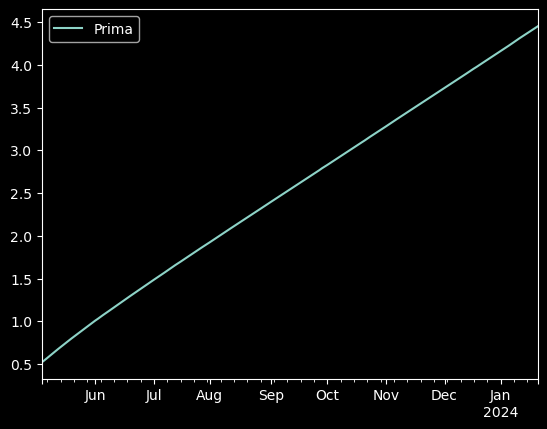

In [52]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes2-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [53]:
call.iloc[-1]

Prima    4.449892
Name: 2024-01-19 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [54]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(4.426574710227243, 4.473209260161379)
(4.426574710227243, 4.473209260161379)


### Análisis de la distribución de los rendimientos

### Ajustando norm

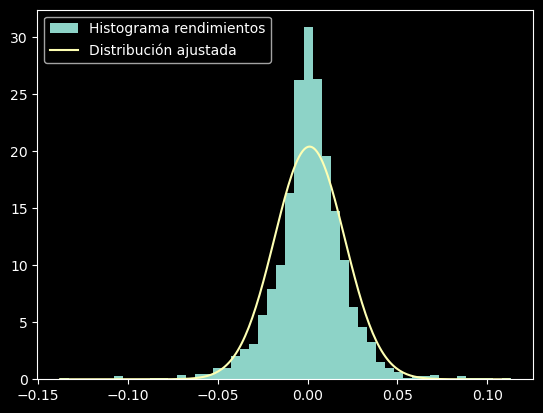

In [55]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


### Ajustando t

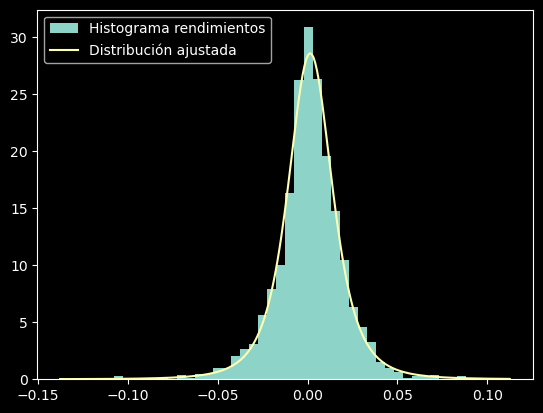

In [56]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

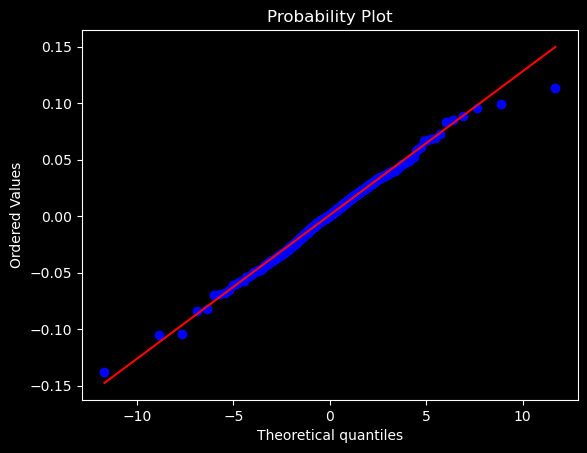

In [57]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [58]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [59]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [60]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,3,4,5,6,7,8,9
2023-05-04,-0.007258,0.002777,0.012811,0.027863,0.017829,0.012811,0.027863,0.027863,-0.007258,-0.022310
2023-05-05,0.017829,-0.002241,0.037898,-0.037362,0.017829,-0.017293,-0.012275,0.002777,0.002777,0.007794
2023-05-06,0.002777,0.012811,0.012811,0.012811,-0.017293,0.022846,-0.022310,0.007794,0.017829,0.022846
2023-05-07,-0.027327,0.052950,0.002777,0.027863,-0.002241,-0.007258,0.007794,0.037898,0.037898,-0.042379
2023-05-08,0.017829,-0.007258,-0.002241,-0.002241,0.002777,0.032880,0.007794,0.007794,0.007794,-0.007258
...,...,...,...,...,...,...,...,...,...,...
2023-08-16,0.037898,-0.002241,0.007794,-0.007258,0.022846,0.017829,0.007794,0.012811,0.042915,0.022846
2023-08-17,0.012811,0.002777,-0.032345,0.012811,0.022846,0.012811,0.007794,0.007794,0.037898,-0.012275
2023-08-18,0.047932,0.022846,-0.052414,0.002777,0.022846,0.002777,0.007794,-0.007258,-0.012275,0.022846
2023-08-19,0.007794,-0.027327,0.027863,0.007794,0.007794,-0.032345,-0.132691,-0.012275,0.012811,0.017829


In [61]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,3,4,5,6,7,8,9
2023-05-04,164.318039,165.975209,167.649092,170.191622,168.492353,167.649092,170.191622,170.191622,164.318039,161.863256
2023-05-05,167.273861,165.603725,174.124549,163.950264,171.523265,164.774920,168.115235,170.664834,164.774920,163.129735
2023-05-06,167.738961,167.738961,176.369650,166.064181,168.582675,168.582675,164.406123,172.000180,167.738961,166.899470
2023-05-07,163.217181,176.860041,176.860041,170.756320,168.205354,167.363530,165.692498,178.643699,174.217890,159.974187
2023-05-08,166.153201,175.581036,176.464194,170.374135,168.673045,172.957993,166.988938,180.041474,175.581036,158.817296
...,...,...,...,...,...,...,...,...,...,...
2023-08-16,371.440662,166.437419,332.622524,234.111271,208.595791,289.028002,253.679965,256.238363,297.861152,155.927995
2023-08-17,376.229887,166.900193,322.036122,237.129819,213.416194,292.754628,255.664852,258.243268,309.366059,154.025629
2023-08-18,394.702679,170.757060,305.591704,237.789152,218.347991,293.568624,257.665270,256.375721,305.591704,157.584980
2023-08-19,397.790980,166.153920,314.226190,239.649703,220.056427,284.225194,225.646712,253.247864,309.531897,160.419685


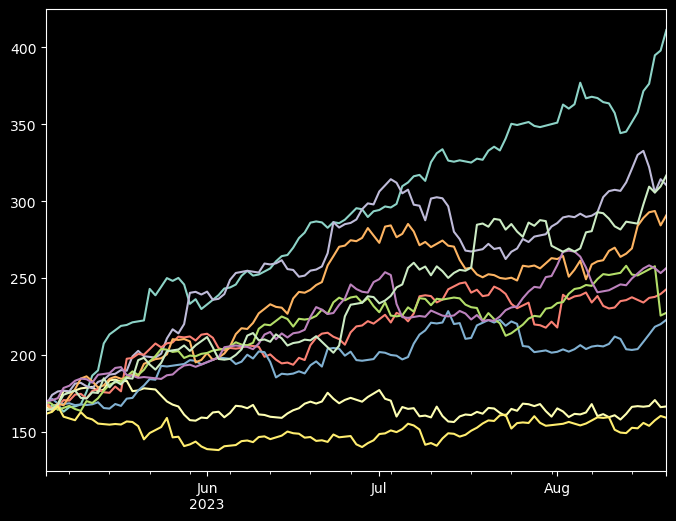

In [62]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

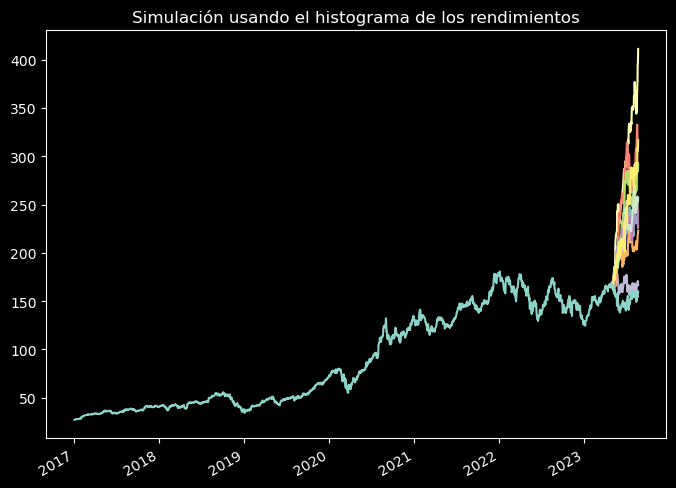

In [63]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [64]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

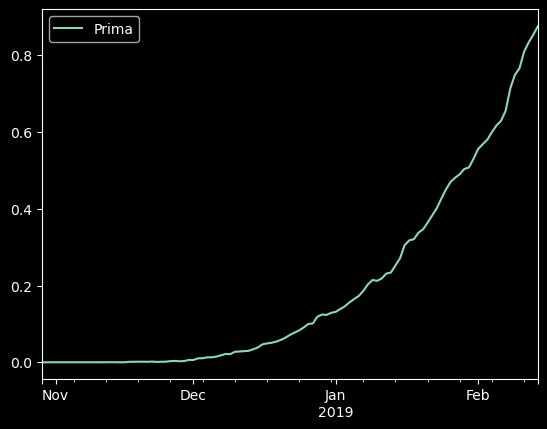

In [65]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [66]:
call_hist.iloc[-1]

Prima    0.875718
Name: 2019-02-14 00:00:00, dtype: float64

In [68]:
opcion_valuar

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
23,AAPL240119C00165000,2023-05-04 17:49:35+00:00,165.0,18.77,18.3,18.55,-0.85,-4.332316,332,18815,0.329017,True,REGULAR,USD


Intervalo de confianza del 95%

In [ ]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


# <font color = 'red'> Ejercicio: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modified by Oscar Jaramillo Z.
</footer>